# Multi-class Classification and Neural Networks
## Multi-class Classification
For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this
classification task.  
In the first part of the exercise, you will extend your previous implemention of logistic regression and apply it to one-vs-all classification.
### Dataset
You are given a data set in ex3data1.mat that contains 5000 training examples of handwritten digits.1 The .mat format means that that the data has been saved in a native Octave/Matlab matrix format, instead of a text (ASCII) format like a csv-file.  

These matrices can be read directly into your program by using the load command.  
After loading, matrices of the correct dimensions and values will appear in your program’s memory. The matrix will already be named, so you do not need to assign names to them.

There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit.  
Each pixel is represented by a floating point number indicating the grayscale intensity at that location.  
The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X.  
This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.
#### .mat格式
Mat文件格式，实际上使用的是一种通用的数值数据存储格式Hierarchical Data Format(HDF)，该格式最先是由美国国家超级计算应用中心开发的，后来由HDF非盈利组织资助，进行不但完善和推广。 这个格式的使用是非常广泛的(使用BSD许可证)，例如一些大名鼎鼎的商业和非商业软件LabVIEW,MATLAB,Scilab,Octave,Mathematica等都支持该格式，该格式目前主要有HDF4和HDF5。 Mat文件格式最新的7.3版是基于HDF5的。
#### `loadmat()`读取.mat格式
我们使用scipy的io子包中的`loadmat()`来读取.mat文件

In [505]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [389]:
data = loadmat("ex3data1.mat")
X = data['X']
y = data['y']
print(X.shape)
print(type(X))
print(y.shape)

(5000, 400)
<class 'numpy.ndarray'>
(5000, 1)


### Visualizing the data

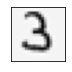

this should be [3]


In [383]:
def plot_an_image(image):
    fig,ax1 = plt.subplots(figsize=(1, 1))
    ax1.imshow(image.reshape((20, 20),order='F'), cmap='binary')
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

pick_one = np.random.randint(0, 5000)
plot_an_image(X[pick_one, :])
plt.show()
print('this should be {}'.format(y[pick_one]))

In [479]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size),order='F'),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

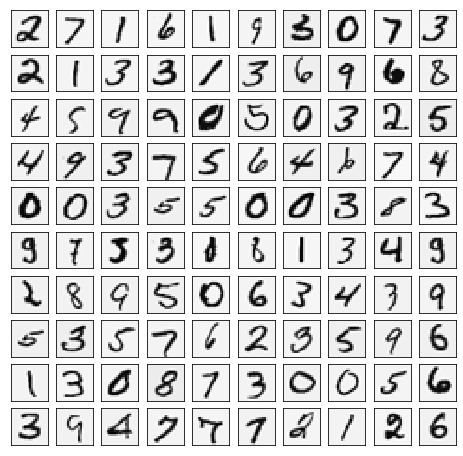

In [480]:
plot_100_image(X)

In [545]:
def sigmoid(x):
    return 1/( 1 + np.exp(-x) )
def reg_cost_comput(theta,X,y,reg_lambda):
    theta = np.mat(theta).T
    first = np.multiply(np.log(sigmoid(X*theta)),y)
    second = np.multiply(np.log(1-sigmoid(X*theta)),y-1)
    reg = (theta[1:,0].T * theta[1:,0]) * (reg_lambda / (2*X.shape[0]))
    res = float(sum(second-first) / X.shape[0] + reg)
    return res

def reg_gradient(theta,X,y,reg_lambda):
    theta = np.mat(theta).T
    error = sigmoid(X*theta)-y
    grad = ( X.T * error ).T / len(X)
    
    reg = theta[1:,0] * (reg_lambda / len(X))
    grad[0,1:] = grad[0,1:]+reg.T
    return grad

In [563]:
def mulit_classification(X,y,k):
    theta = np.zeros((X.shape[1],k))

    for i in range(1,k+1):
        theta_k = np.zeros(X.shape[1])
        y_k = (y==i).astype(np.int)
        X = np.mat(X)
        y_k = np.mat(y_k)
        result = opt.minimize(fun=reg_cost_comput,\
                    x0=theta_k, args=(X,y_k,reg_lambda),\
                    method='L-BFGS-B', jac=reg_gradient,\
                    options={'maxiter': 400})
        theta[:,i-1] = result["x"].T
        print(i) #监测训练进度
    return theta
#         print(reg_cost_comput(theta_k,X,y,reg_lambda))

        
        
reg_lambda=1
X_i = np.insert(X,0,1,axis=1)

theta = mulit_classification(X_i,y,10)

In [498]:
print(theta.shape)
def predict(X,theta,k):
    X_k = np.mat(X)
    theta_k = np.mat(theta[1:,k-1]).T
    return sigmoid(theta[0,k-1] + X_k * theta_k)

(401, 10)


In [473]:
# prediction = predict(X,theta,6)
# prediction = prediction[prediction>0.5]
# print(prediction.shape)

(1, 486)


In [582]:
prediction = np.zeros((len(X),10))

for i in range(10):
   prediction[:,i] = predict(X,theta,i).T


y_pred = np.argmax(prediction,axis=1)
y_answer = y.copy()
y_answer[y_answer==10] = 0
print(classification_report(y_answer,y_pred))
# multi_decision=[]
# for i in range(5000):
#     temp = prediction[i,:]
#     count = len(temp[temp>=0.5])
#     if count < 1:
#         multi_decision.append((i,count))

# print(len(multi_decision))


ValueError: shapes (5000,400) and (24,1) not aligned: 400 (dim 1) != 24 (dim 0)

In [584]:
y_pred?

# Neural Network

In [537]:
param = loadmat("./ex3weights.mat")
param

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [549]:
Theta = []
Theta.append(param['Theta1'])
Theta.append(param['Theta2'])
print(Theta[0].shape)
print(type(Theta[0]))

(25, 401)
<class 'numpy.ndarray'>


In [561]:
def Forward_Propagation(param,X,layer):
    z = []
    a = []
    a.append(X.T)
    for i in range(layer-1):
        mat_z = np.mat(param[i]) * a[i] 
        z.append(mat_z)
        a.append(sigmoid(mat_z))
        if i != layer-2:
            a[i+1] = np.mat(np.r_[np.ones((1,a[i+1].shape[1])),np.array(a[i+1])])
        print()
    return a

In [612]:
a = Forward_Propagation(Theta,X_i,3)
nn_y_pred = a[2]
# print(type(a[2][0,:]))
print(nn_y_pred.shape)
nn_y_pred = np.argmax(nn_y_pred,axis=0)
# nn_y_pred = np.reshape(nn_y_pred,5000)

# nn_y_pred.shape
# y_answer = y.copy()
# y_answer[y_answer==10] = 0
# print(classification_report(y_answer,nn_y_pred))



(10, 5000)


In [622]:
a[2].shape
a[2]

matrix([[1.12661530e-04, 4.79026796e-04, 8.85702310e-05, ...,
         5.17641791e-02, 8.30631310e-04, 4.81465717e-05],
        [1.74127856e-03, 2.41495958e-03, 3.24266731e-03, ...,
         3.81715020e-03, 6.22003774e-04, 4.58821829e-04],
        [2.52696959e-03, 3.44755685e-03, 2.55419797e-02, ...,
         2.96297510e-02, 3.14518512e-04, 2.15146201e-05],
        ...,
        [4.01468105e-04, 2.39107046e-03, 6.22892325e-02, ...,
         2.15667361e-03, 1.19366192e-02, 5.73434571e-03],
        [6.48072305e-03, 1.97025086e-03, 5.49803551e-03, ...,
         6.49826950e-01, 9.71410499e-01, 6.96288990e-01],
        [9.95734012e-01, 9.95696931e-01, 9.28008397e-01, ...,
         2.42384687e-05, 2.06173648e-04, 8.18576980e-02]])

In [619]:
nn_y_pred[0,1000:1030]

matrix([[1, 1, 1, ..., 6, 6, 6]])

In [621]:
y_answer[1000:1030]

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]], dtype=uint8)